In [207]:
import numpy as np
import os
from PIL import Image, ImageOps  
from matplotlib import pyplot as plt
from scipy import stats
import statistics


In [208]:
image_1 = Image.open("color/image1.jpg")
image_2 = Image.open("color/image2.jpg")

width_1, height_1 = image_1.size
width_2, height_2 = image_2.size

image_1_grayscale = image_1.convert('L')
image_2_grayscale = image_2.convert('L')

image_1_grayscale.save("grayscale/image_1_grayscale.jpg")
image_2_grayscale.save("grayscale/image_2_grayscale.jpg")

## Before grayscale transformation

<img src = "color/image1.jpg" width=360 height=640>
<img src = "color/image2.jpg" width=600 height=400>

## After grayscale transformation

<img src = "grayscale/image_1_grayscale.jpg" width=360 height=640>
<img src = "grayscale/image_2_grayscale.jpg" width=600 height=400>

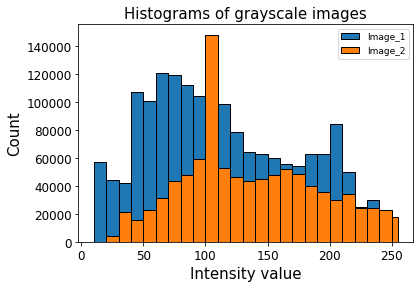

In [209]:
image_1_grayscale = np.asarray(image_1_grayscale)
image_2_grayscale = np.asarray(image_2_grayscale)

plt.hist(image_1_grayscale.flatten(),label = 'Image_1', bins=[10, 20, 30, 40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,255], edgecolor = 'black')
plt.hist(image_2_grayscale.flatten(),label = 'Image_2', bins=[10, 20, 30, 40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,255], edgecolor = 'black')

plt.title("Histograms of grayscale images",fontsize=15) 
plt.xlabel('Intensity value',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='upper right',fontsize=9)
plt.show()


# Calculate means

ModeResult(mode=array([[ 43,  43,  43, ..., 218,   1,   2]], dtype=uint8), count=array([[51, 46, 44, ..., 36, 36, 35]]))


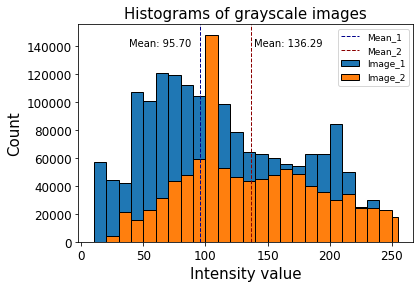

In [215]:
plt.hist(image_1_grayscale.flatten(),label = 'Image_1', bins=[10, 20, 30, 40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,255], edgecolor = 'black')
plt.hist(image_2_grayscale.flatten(),label = 'Image_2', bins=[10, 20, 30, 40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,255], edgecolor = 'black')

plt.title("Histograms of grayscale images",fontsize=15) 
plt.xlabel('Intensity value',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

m = stats.mode(image_1_grayscale)
print(m)


#MEAN HIST_1
plt.axvline(np.mean(image_1_grayscale),label = 'Mean_1', color='darkblue', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(image_1_grayscale)*0.4, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(image_1_grayscale)))

#MEAN HIST_2
plt.axvline(np.mean(image_2_grayscale),label = 'Mean_2', color='darkred', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(image_2_grayscale)*1.02, max_ylim*0.9, 'Mean: {:.2f}'.format(np.mean(image_2_grayscale)))

plt.legend(loc='upper right',fontsize=9)

plt.show()

# Calculate medians

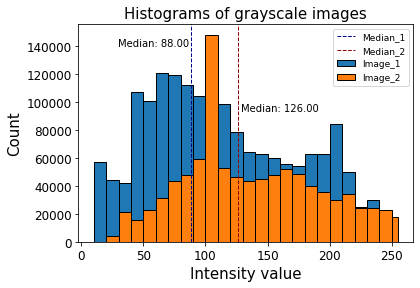

In [211]:
plt.hist(image_1_grayscale.flatten(),label = 'Image_1', bins=[10, 20, 30, 40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,255], edgecolor = 'black')
plt.hist(image_2_grayscale.flatten(),label = 'Image_2', bins=[10, 20, 30, 40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,255], edgecolor = 'black')

plt.title("Histograms of grayscale images",fontsize=15) 
plt.xlabel('Intensity value',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#MEDIAN HIST_1
plt.axvline(np.median(image_1_grayscale),label = 'Median_1', color='darkblue', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(np.median(image_1_grayscale)*0.34, max_ylim*0.9, 'Median: {:.2f}'.format(np.median(image_1_grayscale)))

#MEDIAN HIST_2
plt.axvline(np.median(image_2_grayscale),label = 'Median_2', color='darkred', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(np.median(image_2_grayscale)*1.02, max_ylim*0.6, 'Median: {:.2f}'.format(np.median(image_2_grayscale)))

plt.legend(loc='upper right',fontsize=9)

plt.show()